# Projekt LAB 1 Dane Facebook 
Maciej Klimiuk , Hanna Mika



    Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  Użytkownicy_mln
0  2009               777           229          1218              360
1  2010              1974           606          2127              608
2  2011              3711          1000          3200              845
3  2012              5089            53          4619             1056
4  2013              7872          1500          6337             1228
5  2014             12466          2940          9199             1393
6  2015             17928          3688         12691             1591
7  2016             27638         10217         17048             1860
8  2017             40653         15934         25105             2129


D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


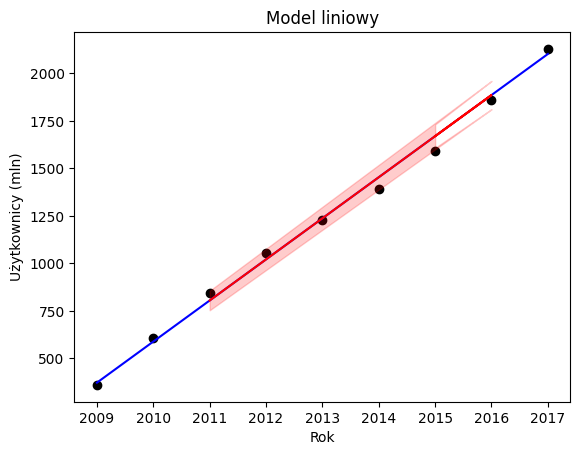

Współczynnik determinacji dla modelu liniowego: 0.9846143144383221
Prognoza liniowa na 2021 rok: 2967.46 mln użytkowników
Średni błąd predykcyjny dla modelu liniowego: 48.39 mln użytkowników
Średni błąd predykcyjny dla modelu logarytmicznego: 861.89 mln użytkowników
Prognoza logarytmiczna na 2021 rok: 4441.56 mln użytkowników


D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# Wczytaj dane
data = pd.read_csv("data.csv", sep=";")
print(data)

# Model liniowy na danych pierwotnych
X_train, X_test, y_train, y_test = train_test_split(data[["Rok"]], data["Użytkownicy_mln"], test_size=0.3, random_state=None)
model = LinearRegression()
model.fit(X_train, y_train)

# Prognozy i przedziały ufności dla danych pierwotnych
y_pred_test = model.predict(X_test)
y_pred_all = model.predict(data[["Rok"]])
n_train = len(X_train)
mean_x_train = np.mean(X_train)
sum_sq_errors = np.sum((y_train - model.predict(X_train)) ** 2)
stdev = np.sqrt(sum_sq_errors / (n_train - 2))
confidence = 0.95
t_value = stats.t.ppf((1 + confidence) / 2, df=n_train - 2)
conf_interval = t_value * stdev * np.sqrt(1 / n_train + (X_test.values.flatten() - mean_x_train) ** 2 / np.sum((X_train.values.flatten() - mean_x_train) ** 2))

# Wykres danych rzeczywistych, prognozy i przedziału ufności wraz z liniowymi prognozami wraz z predykcją na 2021 rok liniowa funckja
plt.scatter(data["Rok"], data["Użytkownicy_mln"], color="black")
plt.plot(data["Rok"], y_pred_all, color="blue")
plt.plot(X_test, y_pred_test, color="red")
plt.fill_between(X_test.values.flatten(), y_pred_test - conf_interval, y_pred_test + conf_interval, color="red", alpha=0.2)
# 2021 rok prognoza
pred_linear = model.predict([[2021]])

plt.xlabel("Rok")
plt.ylabel("Użytkownicy (mln)")
plt.title("Model liniowy")
plt.show()


# Współczynnik determinacji i prognoza na 2021 rok
r2 = model.score(X_test, y_test)
print(f"Współczynnik determinacji dla modelu liniowego: {r2}")
pred_linear = model.predict([[2021]])
print(f"Prognoza liniowa na 2021 rok: {pred_linear[0]:.2f} mln użytkowników")
mean_error_linear = np.mean(np.abs(y_test - y_pred_test))
print(f"Średni błąd predykcyjny dla modelu liniowego: {mean_error_linear:.2f} mln użytkowników")

# Model liniowy na logarytmicznych danych użytkowników
data["Użytkownicy_log"] = np.log(data["Użytkownicy_mln"])
X_train, X_test, y_train, y_test = train_test_split(data[["Rok"]], data["Użytkownicy_log"], test_size=0.3, random_state=None)
model = LinearRegression()
model.fit(X_train, y_train)

# Prognozy i przekształcenie na skalę pierwotną
y_pred_test_log = np.exp(model.predict(X_test))
y_pred_all_log = np.exp(model.predict(data[["Rok"]]))
pred_log = np.exp(model.predict([[2021]]))


# Obliczenia błędu predykcyjnego dla logarytmicznych danych
mean_error_log = np.mean(np.abs(y_test - y_pred_test_log))
print(f"Średni błąd predykcyjny dla modelu logarytmicznego: {mean_error_log:.2f} mln użytkowników")
print(f"Prognoza logarytmiczna na 2021 rok: {pred_log[0]:.2f} mln użytkowników")


# zagwarantować że model uczy się na danych od 2009 do 2014
# dane testowe 2015 do 2017
# linie wzdłuż prostej okreslające przedział ufnosci

#hej


In [23]:
# wykresy

fig = px.scatter_matrix(data)
fig.show()
 

In [22]:

# wszystkie korelacje
print(data.corr())


                       Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
Rok               1.000000          0.923356      0.834622      0.940966   
Przychód w mln $  0.923356          1.000000      0.977966      0.997977   
Zysk w mln $      0.834622          0.977966      1.000000      0.963747   
Zatrudnienie      0.940966          0.997977      0.963747      1.000000   
Użytkownicy_mln   0.997651          0.933496      0.852985      0.949059   

                  Użytkownicy_mln  
Rok                      0.997651  
Przychód w mln $         0.933496  
Zysk w mln $             0.852985  
Zatrudnienie             0.949059  
Użytkownicy_mln          1.000000  
